# Desafio: Cálculo de Métricas de Avaliação de Aprendizado

Este projeto demonstra como calcular e monitorar um conjunto detalhado de métricas de avaliação para um modelo de classificação binária durante seu treinamento. As métricas são aplicadas a um modelo de *Transfer Learning* que classifica imagens de cães e gatos.

## Dependências

As bibliotecas necessárias para executar este notebook estão listadas abaixo. Você pode instalá-las usando `pip`.

In [1]:
!pip install tensorflow tensorflow-datasets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 744.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.8 MB/s eta 0:00:00


## Funções de Métricas

Este módulo contém funções para calcular métricas de avaliação de modelos de classificação.

In [4]:
# -*- coding: utf-8 -*-
"""
Este módulo contém funções para calcular métricas de avaliação de modelos de classificação.
"""

def calculate_accuracy(tp, tn, fp, fn):
    """Calcula a acurácia."""
    total = tp + tn + fp + fn
    if total == 0:
        return 0.0
    return (tp + tn) / total

def calculate_recall(tp, fn):
    """Calcula a sensibilidade (recall)."""
    total = tp + fn
    if total == 0:
        return 0.0
    return tp / total

def calculate_specificity(tn, fp):
    """Calcula a especificidade."""
    total = tn + fp
    if total == 0:
        return 0.0
    return tn / total

def calculate_precision(tp, fp):
    """Calcula a precisão."""
    total = tp + fp
    if total == 0:
        return 0.0
    return tp / total

def calculate_f_score(precision, recall):
    """Calcula o F-score."""
    total = precision + recall
    if total == 0:
        return 0.0
    return 2 * (precision * recall) / total

## Callback Personalizado para Métricas

In [6]:
import tensorflow as tf
import numpy as np

class MetricsCallback(tf.keras.callbacks.Callback):
    """
    Callback para calcular e exibir métricas de classificação ao final de cada época.
    """
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        tp, tn, fp, fn = 0, 0, 0, 0

        for x_val, y_val in self.validation_data:
            predictions = self.model.predict(x_val, verbose=0)
            y_pred = (np.sign(predictions) + 1) / 2
            y_pred = y_pred.flatten().astype(int)
            y_true = y_val.numpy().flatten().astype(int)

            tp += np.sum((y_true == 1) & (y_pred == 1))
            tn += np.sum((y_true == 0) & (y_pred == 0))
            fp += np.sum((y_true == 0) & (y_pred == 1))
            fn += np.sum((y_true == 1) & (y_pred == 0))

        accuracy = calculate_accuracy(tp, tn, fp, fn)
        recall = calculate_recall(tp, fn)
        specificity = calculate_specificity(tn, fp)
        precision = calculate_precision(tp, fp)

        if precision > 0 and recall > 0:
            f_score = calculate_f_score(precision, recall)
        else:
            f_score = 0.0

        print(f'''
--- Relatório da Época {epoch + 1} ---
Matriz de Confusão: VP={tp}, VN={tn}, FP={fp}, FN={fn}
Acurácia de Validação (calculada): {accuracy:.4f}
Sensibilidade (Recall): {recall:.4f}
Especificidade: {specificity:.4f}
Precisão: {precision:.4f}
F-score: {f_score:.4f}
-----------------------------------
''')

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


## Configuração, Treinamento e Avaliação do Modelo

Esta célula contém todo o fluxo de trabalho: configura a estratégia de hardware (TPU/GPU/CPU), carrega os dados, define o modelo, treina e avalia.

Running on CPU
REPLICAS:  1


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.EUNCNN_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
581/582 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7800 - loss: 0.4057
--- Relatório da Época 1 ---
Matriz de Confusão: VP=1173, VN=1073, FP=47, FN=33
Acurácia de Validação (calculada): 0.9656
Sensibilidade (Recall): 0.9726
Especificidade: 0.9580
Precisão: 0.9615
F-score: 0.9670
-----------------------------------

582/582 ━━━━━━━━━━━━━━━━━━━━ 67s 110ms/step - accuracy: 0.7803 - loss: 0.4052 - val_accuracy: 0.9596 - val_loss: 0.1217
Epoch 2/10
581/582 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9674 - loss: 0.1026
--- Relatório da Época 2 ---
Matriz de Confusão: VP=1182, VN=1087, FP=33, FN=24
Acurácia de Validação (calculada): 0.9755
Sensibilidade (Recall): 0.9801
Especificidade: 0.9705
Precisão: 0.9728
F-score: 0.9765
-----------------------------------

582/582 ━━━━━━━━━━━━━━━━━━━━ 61s

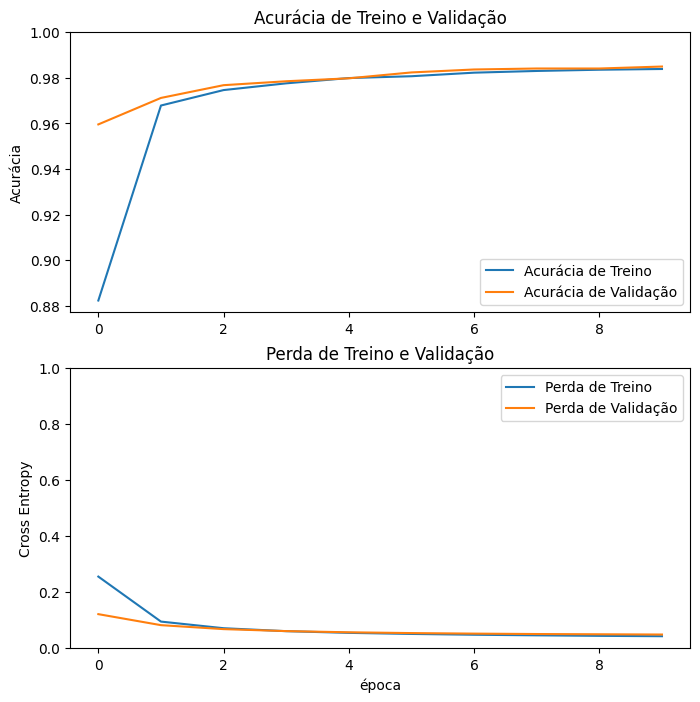

73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9832 - loss: 0.0419

Acurácia no conjunto de teste: 98.24%


In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Configurar Estratégia de Hardware (TPU/GPU/CPU)
# --------------------------------------------------
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        strategy = tf.distribute.MirroredStrategy()
        print(f'Running on {len(gpus)} GPU(s)')
    else:
        strategy = tf.distribute.get_strategy()
        print('Running on CPU')
print("REPLICAS: ", strategy.num_replicas_in_sync)

# 2. Carregar e Preparar o Dataset
# ---------------------------------
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

BATCH_SIZE = 32 * strategy.num_replicas_in_sync
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

# 3. Criar e Compilar o Modelo Dentro do Escopo da Estratégia
# ------------------------------------------------------------
with strategy.scope():
    IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1)
    ])
    base_learning_rate = 0.0001 * strategy.num_replicas_in_sync
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# 4. Treinar o Modelo
# -------------------
initial_epochs = 10
metrics_callback = MetricsCallback(validation_data=validation_batches)
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    callbacks=[metrics_callback])

# 5. Avaliar o Modelo
# -------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Acurácia de Treino')
plt.plot(val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.ylabel('Acurácia')
plt.ylim([min(plt.ylim()),1])
plt.title('Acurácia de Treino e Validação')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Perda de Treino')
plt.plot(val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Perda de Treino e Validação')
plt.xlabel('época')
plt.show()

loss, accuracy = model.evaluate(test_batches)
print('\nAcurácia no conjunto de teste: {:.2f}%'.format(accuracy * 100))